# Result Anaysis

## Import 

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
%load_ext autoreload
%autoreload 2

## Load Data

In [2]:
df = pd.read_csv(
    '../../not_on_git/final_classification/all_classified.csv' , 
    usecols=['name'  , 'ra' ,'dec' ,'prob', 'class' , 'prob_margin' ] , 
    index_col='name')
df 

,ra,dec,class,prob,prob_margin
name,,,,,
2CXO J003935.9-732725,9.899767,-73.457136,STAR,0.777433,0.638933
2CXO J003936.7-731249,9.903193,-73.213742,PULSAR,0.608646,0.451597
2CXO J004028.7-731106,10.119748,-73.185171,AGN,0.446212,0.092019
2CXO J004506.3-730056,11.276413,-73.015666,PULSAR,0.598368,0.283901
2CXO J004659.0-731918,11.745895,-73.321890,STAR,0.821817,0.718309
...,...,...,...,...,...
2CXO J220433.1-495916,331.138121,-49.987838,HMXB,0.671695,0.438401
2CXO J220508.3-495935,331.284642,-49.993301,HMXB,0.913425,0.850303
2CXO J220544.0-495505,331.433541,-49.918280,HMXB,0.801407,0.710030


## Result data analysis

In [3]:
from utilities import deets

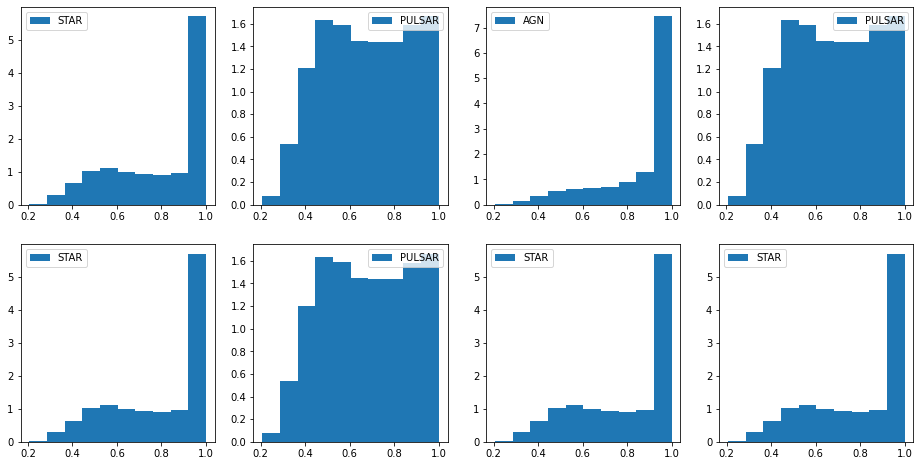

In [9]:
fig,ax = plt.subplots(nrows=2 , ncols=4 , figsize=(16,8))
for c , a in zip(df['class'].to_list() , ax.ravel()):
    a.hist(df[df['class']==c]['prob'] ,  density =True , label = c)
    a.legend()
plt.show()
